In [ ]:
from google.colab import drive
import os

drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/mp 1/wortelroket'
!ls "/content/drive/MyDrive/mp 1/wortelroket"

 bahan	 latih	' validasi'


In [ ]:
bahan_dir = os.path.join(base_dir,'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, ' validasi')

In [ ]:
wortel_dir = os.path.join(bahan_dir,'wortel/')
roket_dir = os.path.join(bahan_dir,'roket/')

print("jumlah data train tiap kelas")
print("jumlah gambar wortel :",len(os.listdir(wortel_dir)))
print("jumlah gambar roket:",len(os.listdir(roket_dir)))

jumlah data train tiap kelas
jumlah gambar wortel : 143
jumlah gambar roket: 162


In [ ]:

train_wortel = os.path.join(train_dir ,'wortel/')
train_roket = os.path.join(train_dir ,'roket/')

validation_wortel =  os.path.join(validation_dir ,'wortel/')
validation_roket =  os.path.join(validation_dir ,'roket/')

In [ ]:
import os
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):

    os.makedirs(train, exist_ok=True)
    os.makedirs(val, exist_ok=True)

    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[0:train_size]
    val_files = randomized[train_size:total_size]

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        copyfile(i_file, destination)


train_ratio = 0.9


source_00 = wortel_dir
train_00 = train_wortel
val_00 = validation_wortel
train_val_split(source_00, train_00, val_00, train_ratio)


source_01 = roket_dir
train_01 = train_roket
val_01 = validation_roket
train_val_split(source_01, train_01, val_01, train_ratio)


In [ ]:
print('Jumlah All Wortel :' , len(os.listdir(wortel_dir)))
print('Jumlah Train wortel :', len(os.listdir(train_wortel)))
print('Jumlah Val Wortel:' , len(os.listdir(validation_wortel)))

Jumlah All Wortel : 143
Jumlah Train wortel : 143
Jumlah Val Wortel: 53


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
     rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1

)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)


Found 305 images belonging to 2 classes.
Found 114 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')> 0.99):
      print('/nAkurasi mencapai 99%')
      self.model.stop_training=True

Callbacks = myCallback()

In [ ]:


import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),

    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),

    tf.keras.layers.Dense(2, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
callbacks = myCallback()
history = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs=25,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 723ms/step - accuracy: 0.8769 - loss: 0.3035 - val_accuracy: 0.9000 - val_loss: 0.3342
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 831ms/step - accuracy: 0.9216 - loss: 0.2303 - val_accuracy: 0.8000 - val_loss: 0.1810
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step - accuracy: 0.9190 - loss: 0.3700 - val_accuracy: 1.0000 - val_loss: 0.1247
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 918ms/step - accuracy: 0.7271 - loss: 0.6300 - val_accuracy: 0.8000 - val_loss: 0.3207
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - accuracy: 0.9490 - loss: 0.1668 - val_accuracy: 0.9000 - val_loss: 0.2148
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8000 - loss: 0.2220 - val_accuracy: 1.0000 - val_loss: 0.0585
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 926ms/step - accuracy: 0.9848 - loss: 0.1527 - val_accuracy: 1.0000 - val_loss: 0.0231
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 846ms/step - accuracy: 0.9952 - loss: 0.0558 - val_accuracy: 1.0000 - val_loss: 

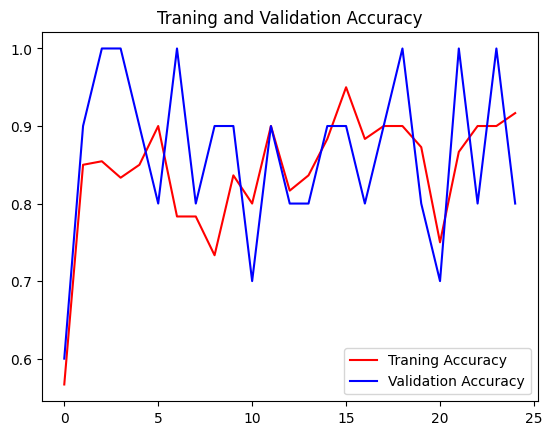

In [ ]:

 %matplotlib inline

 import matplotlib.image as mpimg
 import matplotlib.pyplot as plt


 acc = history.history['accuracy']
 val_acc = history.history['val_accuracy']
 loss = history.history ['loss']
 val_loss = history.history['val_loss']

 epochs = range(len(acc))

 plt.plot(epochs,acc,'r',label = 'Traning Accuracy')
 plt.plot(epochs,val_acc, 'b', label = 'Validation Accuracy')
 plt.title('Traning and Validation Accuracy')
 plt.legend(loc = 'best')
 plt.show()


Saving ce72150e6383de8f.jpg to ce72150e6383de8f.jpg


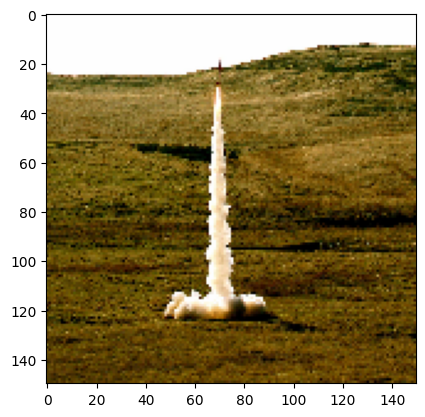

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
ce72150e6383de8f.jpg
This image belongs to class roket


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)

    print(fn)

    class_list = os.listdir(train_dir)

    for j in range(len(class_list)):
        if classes[0][j] == 1.0:
            print('This image belongs to class', class_list[j])
            break
